In [10]:
import numpy as np
import dipoles
import matplotlib.pyplot as plt
from tqdm import tqdm
import frenel
from scipy.integrate import quad
c_const = 299792458

def get_intencity(wl, P,M, eps_Au):
    px,py,pz = P
    mx, my,mz = M
    ka = -1j*np.sqrt(1/(eps_Au(wl)+1))
    kspp = np.sqrt(eps_Au(wl)/(eps_Au(wl)+1))
    return lambda phi:  np.abs((mx/c_const+1j*ka*py)*np.sin(phi) + (my/c_const - 1j*ka*px)*np.cos(phi) - kspp*pz)**2
    
eps_Si = frenel.get_interpolate('Si')
eps_Au = frenel.get_interpolate('Au')

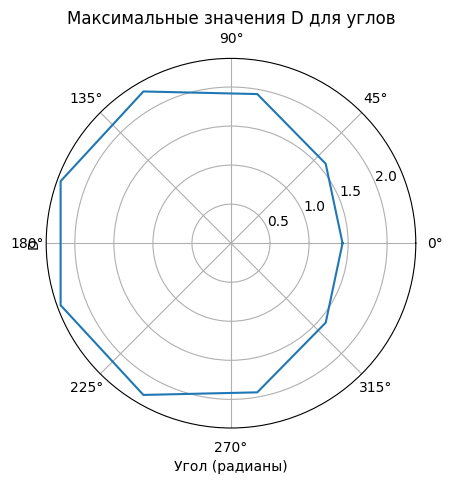

In [ ]:
data = np.load("results.npz", allow_pickle=True)
Ds = data["Ds"]
params = data["params"]
dipoles_p = data["dipoles_p"]
dipoles_m = data["dipoles_m"]
angles = data["angles"]



fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.plot(angles, Ds)
ax.grid(True)
plt.xlabel("Угол (радианы)")
plt.ylabel("D")
ax.set_title("Максимальные значения D для углов")
plt.show()

0.0


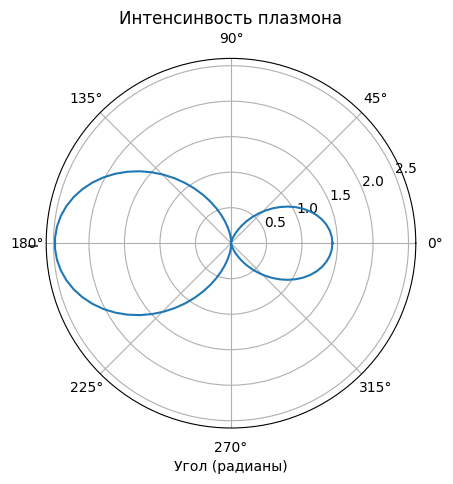

In [15]:
ind = 0
wl = 770
p ,m = dipoles_p[ind],  dipoles_m[ind]

print(angles[ind])
phi = np.linspace(0, 2*np.pi, 100)
intencity = get_intencity(wl, p, m, eps_Au)
Imax = quad(intencity, 0, 2 * np.pi)[0]


fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.plot(phi,  2 * np.pi *intencity(phi) / Imax)
ax.grid(True)
plt.xlabel("Угол (радианы)")
plt.ylabel("I")
ax.set_title("Интенсинвость плазмона")
plt.show()